<a href="https://colab.research.google.com/github/cristobalperezp/Intro_Deep_Learning/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Tarea 1 - Introducción al Deep Learning
<h2 align="center">  Integrantes: Michelle Avendaño, Cristóbal Pérez, Tamara Vallejo, Ignacio Henríquez, Valentín Aquevedo
<h3 align="center"> IN6534-1 - Introducción al Deep Learning
<h3 align="center"> Primavera 2022

---

# Lectura de Datos

In [ ]:
# instalación de librerías y paquetes
! pip install squarify
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuración de gráficos
sns.set(
    context = 'notebook',
    style='whitegrid',
    palette = sns.color_palette("vlag")
    )
cmap = sns.color_palette("vlag", as_cmap=True)

In [ ]:
# cargar el repositorio
!git clone 'https://github.com/cristobalperezp/Intro_Deep_Learning.git'

fatal: destination path 'Intro_Deep_Learning' already exists and is not an empty directory.


In [ ]:
# setear el path
path_base = '/content/Intro_Deep_Learning'

In [ ]:
# lectura de datos
df = pd.read_excel('/content/Intro_Deep_Learning/T1_credito.xlsx')

# Análisis Exploratorio de Datos

## Exploración Inicial

In [ ]:
# head
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S


In [ ]:
# shape: # instancias y atributos
df.shape

(3000, 11)

In [ ]:
# atributos, types y no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3000 non-null   int64  
 1   AgnosDirec    2999 non-null   float64
 2   AgnosEmpleo   2998 non-null   float64
 3   DeudaExt      2999 non-null   float64
 4   DeudaInt      2996 non-null   float64
 5   Edad          2998 non-null   float64
 6   Ingreso       2998 non-null   float64
 7   Ingreso2      3000 non-null   float64
 8   Nacionalidad  3000 non-null   object 
 9   NivelEdu      3000 non-null   object 
 10  VarObj        3000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 257.9+ KB


In [ ]:
# instancias duplicadas
df.duplicated().sum()

0

In [ ]:
# valores únicos por atributo
df.nunique()

ID              3000
AgnosDirec        45
AgnosEmpleo       41
DeudaExt        2999
DeudaInt        2996
Edad              54
Ingreso         2998
Ingreso2        2999
Nacionalidad       1
NivelEdu           5
VarObj             2
dtype: int64

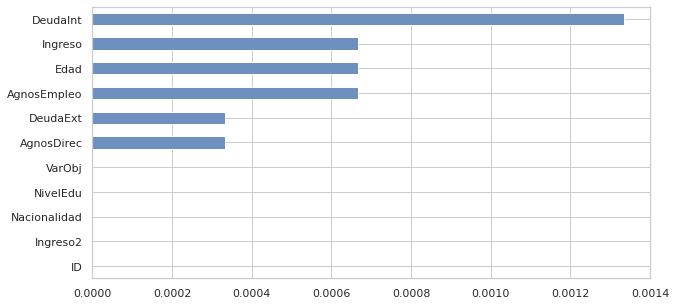

In [ ]:
# gráfico de porcentaje de nulos
(df.isna().sum()/df.shape[0]).sort_values().plot.barh(figsize=(10, 5))

In [ ]:
# estadísticos de variables numéricas
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,101500.500,866.170,100001.000,100750.750,101500.500,102250.250,103000.000
AgnosDirec,2999.0,7.088,6.962,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,2998.0,7.147,6.653,0.000,2.000,5.000,10.000,47.000
DeudaExt,2999.0,4531.013,7084.775,21.551,1110.243,2278.662,5093.769,123939.236
DeudaInt,2996.0,2275.677,5409.792,8.304,416.039,958.279,2318.271,190648.853
Edad,2998.0,37.660,36.634,18.000,29.000,36.500,44.000,1970.000
Ingreso,2998.0,62567.743,49385.681,-13123.602,30282.678,49516.129,78851.470,536488.400
Ingreso2,3000.0,52152.667,42246.043,-9723.719,25109.557,40632.271,66206.198,513618.589


In [ ]:
# Outliers en: Edad, Ingreso1, Ingreso2

In [ ]:
# filtro en edad
mask = df['Edad']>90
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
137,100138,7.0,13.0,11982.421363,8423.543356,1970.0,134230.440064,114093.282397,N,Med,N


In [ ]:
# corrección de instancia asumiendo año de nacimiento
mask = df['ID'] == 100138
df.loc[mask,'Edad'] = 2022-df[mask]['Edad']

In [ ]:
mask = df['Edad']>90
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


In [ ]:
# filtro en ingreso
mask = df['Ingreso']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
521,100522,3.0,0.0,797.023075,670.738436,29.0,-13123.60228,-9723.719313,N,Bas,S


In [ ]:
# correción de instancia asumiendo el negativo de los ingresos
mask = df['ID'] == 100522
df.loc[mask,'Ingreso'] = -df[mask]['Ingreso']

In [ ]:
mask = df['Ingreso']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


In [ ]:
mask = df['Ingreso2']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
521,100522,3.0,0.0,797.023075,670.738436,29.0,13123.60228,-9723.719313,N,Bas,S


In [ ]:
mask = df['ID'] == 100522
df.loc[mask,'Ingreso2'] = -df[mask]['Ingreso2']

In [ ]:
mask = df['Ingreso2']<0
df[mask]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


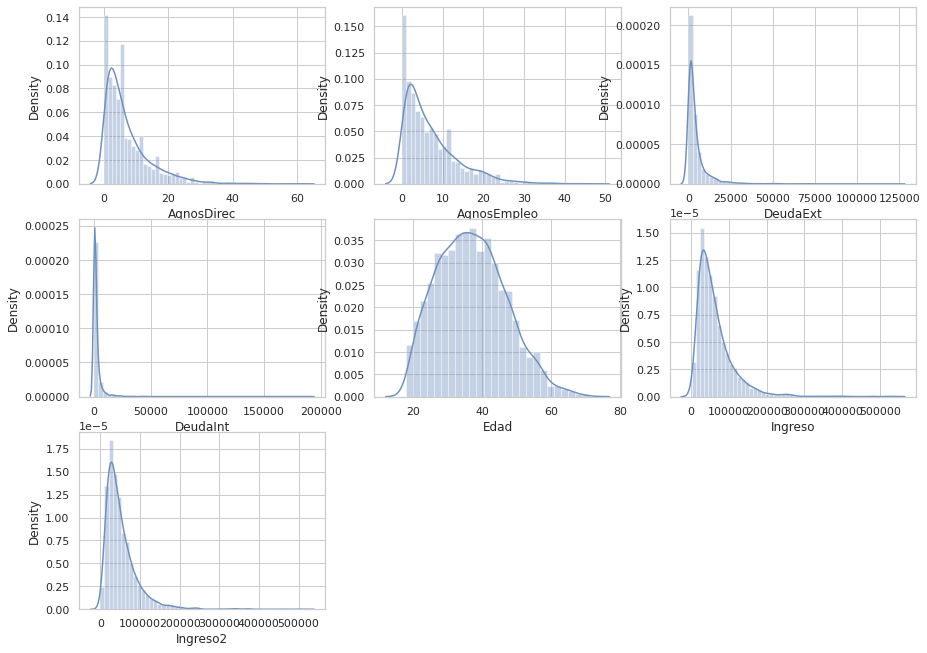

In [ ]:
# distplot de variables numéricas
graf = df.copy()
graf = graf.iloc[:,1:8]

f = plt.figure(figsize=(15,15))
for i in range(7):
    f.add_subplot(4, 3, i+1)
    sns.distplot(graf.iloc[:,i])
plt.show()

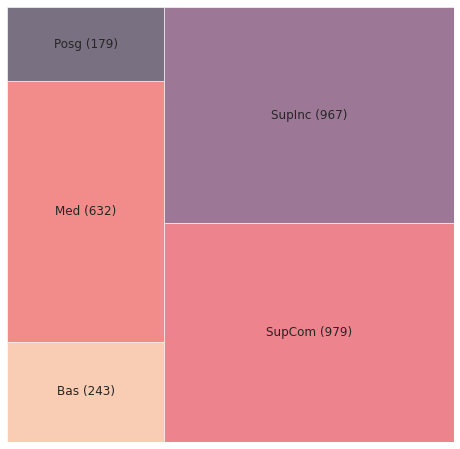

In [ ]:
# treemap según nivel educacional
a = df.groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df.groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

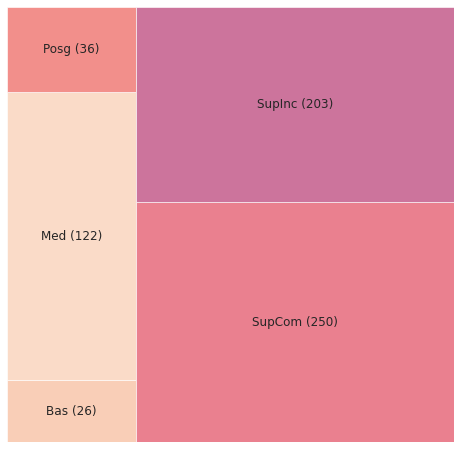

In [ ]:
# treemap según nivel educacional para malos pagadores
mask = df['VarObj'] == 'S'
a = df[mask].groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

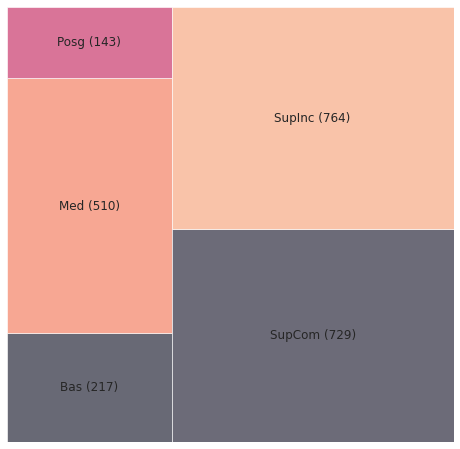

In [ ]:
# treemap según nivel educacional para buenos pagadores
mask = df['VarObj'] == 'N'
a = df[mask].groupby('NivelEdu').sum().index.get_level_values(0).tolist()
d = df[mask].groupby('NivelEdu').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

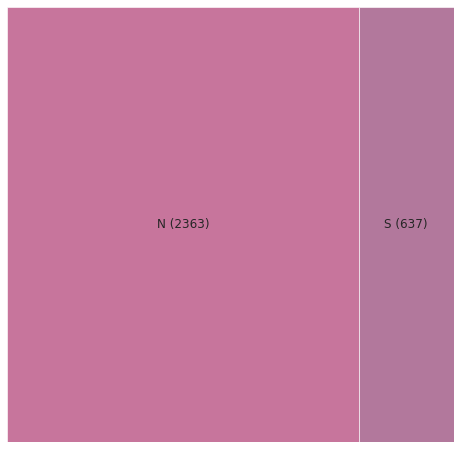

In [ ]:
# treemap de variable objetivo
a = df.groupby('VarObj').count().index.get_level_values(0).tolist()
d = df.groupby('VarObj').count().reset_index()['ID'].tolist()
for i in range(len(a)):
  a[i] = str(a[i]) + ' (' + str(d[i])+ ')'
plt.figure(figsize=(8,8))
squarify.plot(sizes=d, label=a, alpha=.6)
plt.axis('off')
plt.show()

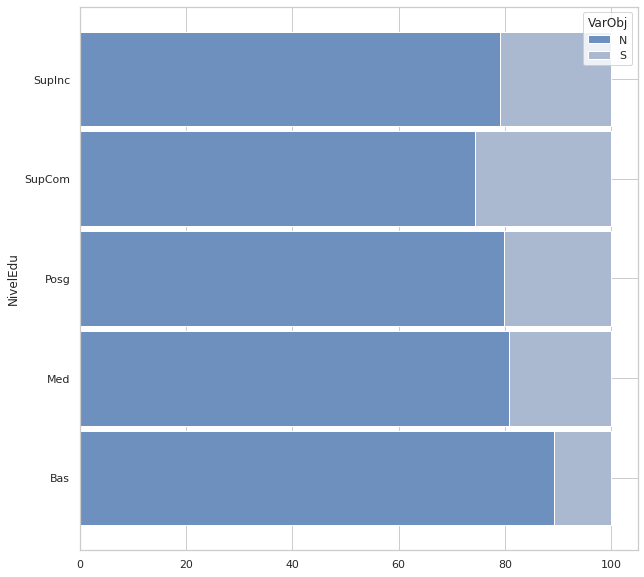

In [ ]:
# gráfico de mosaico según nivel educacional de los pagadores
fig, ax = plt.subplots(figsize=(10, 10))
pd.crosstab(index=df['VarObj'], 
            columns=df['NivelEdu']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0).T.plot(kind='barh',stacked=True,width=0.95,ax=ax)

## Pre-procesamiento

In [ ]:
# imputar según la media en variables con datos nulos
null = ['AgnosDirec','AgnosEmpleo','DeudaExt','DeudaInt','Edad','Ingreso']
for n in null:
  mean = df[n].mean(skipna=True)
  df[n].fillna(value=mean,inplace=True)
df.isna().sum()

ID              0
AgnosDirec      0
AgnosEmpleo     0
DeudaExt        0
DeudaInt        0
Edad            0
Ingreso         0
Ingreso2        0
Nacionalidad    0
NivelEdu        0
VarObj          0
dtype: int64

In [ ]:
# crear variables DeudaIng y DeudaTotal
df['DeudaIng'] = (df['DeudaExt']+df['DeudaInt'])/df['Ingreso']
df['DeudaTotal'] = (df['DeudaExt']+df['DeudaInt'])
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj,DeudaIng,DeudaTotal
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S,0.268601,17222.021160
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N,0.152004,18857.917432
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N,0.065726,2103.955206
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N,0.077474,13351.733785
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S,0.076554,1985.634620


## Transformaciones

In [ ]:
# crear variables normalizadas
ln_var = list(df.describe().columns)[1:]
for l in ln_var:
  var = 'ln_' + l
  df[var] = df[l].apply(lambda x: np.log(x+1) if x == 0 else np.log(x))
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,...,DeudaTotal,ln_AgnosDirec,ln_AgnosEmpleo,ln_DeudaExt,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_Ingreso2,ln_DeudaIng,ln_DeudaTotal
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,...,17222.021160,1.386294,0.693147,9.165551,8.943772,3.688879,11.068472,10.702640,-1.314528,9.753944
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,...,18857.917432,3.332205,3.218876,9.391485,8.835215,3.891820,11.728537,11.349913,-1.883849,9.844688
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,...,2103.955206,0.693147,1.098612,6.935717,6.980633,3.637586,10.373831,10.226977,-2.722257,7.651574
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,...,13351.733785,2.397895,2.639057,9.303312,7.773776,3.761200,12.057210,11.736521,-2.557808,9.499402
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,...,1985.634620,1.098612,0.000000,6.736738,7.041261,3.496508,10.163455,10.075562,-2.569761,7.593694


In [ ]:
# transformar variables categóricas a binarias
df = pd.get_dummies(df,columns=['NivelEdu','VarObj'],drop_first=True)
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,DeudaIng,...,ln_Edad,ln_Ingreso,ln_Ingreso2,ln_DeudaIng,ln_DeudaTotal,NivelEdu_Med,NivelEdu_Posg,NivelEdu_SupCom,NivelEdu_SupInc,VarObj_S
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,0.268601,...,3.688879,11.068472,10.702640,-1.314528,9.753944,0,0,0,1,1
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,0.152004,...,3.891820,11.728537,11.349913,-1.883849,9.844688,1,0,0,0,0
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,0.065726,...,3.637586,10.373831,10.226977,-2.722257,7.651574,0,0,1,0,0
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,0.077474,...,3.761200,12.057210,11.736521,-2.557808,9.499402,0,0,0,0,0
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,0.076554,...,3.496508,10.163455,10.075562,-2.569761,7.593694,0,0,0,1,1


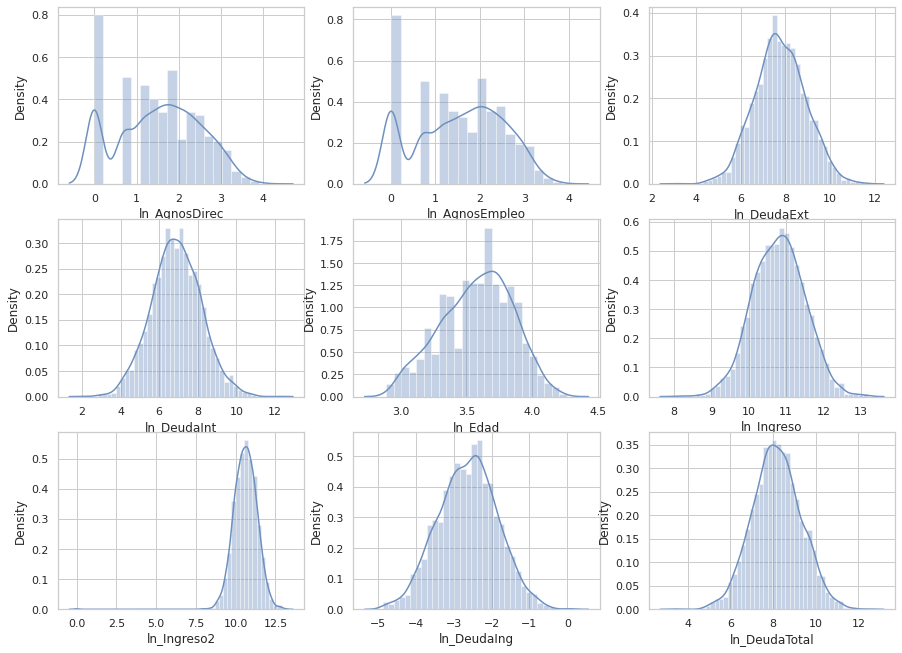

In [ ]:
# distplot tras normalización
graf = df.copy()
graf = graf.iloc[:,11:20]

f = plt.figure(figsize=(15,15))
for i in range(9):
    f.add_subplot(4, 3, i+1)
    sns.distplot(graf.iloc[:,i])
plt.show()

In [ ]:
# estadísticos de variables numéricas
df.iloc[:,1:20].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AgnosDirec,3000.0,7.088,6.961,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,3000.0,7.147,6.651,0.000,2.000,5.000,10.000,47.000
DeudaExt,3000.0,4531.013,7083.594,21.551,1110.371,2278.910,5089.922,123939.236
DeudaInt,3000.0,2275.677,5406.183,8.304,417.285,960.163,2317.458,190648.853
Edad,3000.0,37.020,9.787,18.000,29.000,37.000,44.000,71.000
Ingreso,3000.0,62576.498,49358.117,3141.067,30284.272,49572.952,78817.515,536488.400
Ingreso2,3000.0,52159.149,42238.037,0.000,25109.557,40632.271,66206.198,513618.589
DeudaIng,3000.0,0.097,0.085,0.008,0.042,0.074,0.123,1.088
DeudaTotal,3000.0,6806.690,11118.855,29.855,1670.963,3499.652,7507.897,271283.941
ln_AgnosDirec,3000.0,1.525,0.978,0.000,0.693,1.609,2.303,4.111


In [ ]:
df.columns

Index(['ID', 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
       'Ingreso', 'Ingreso2', 'Nacionalidad', 'DeudaIng', 'DeudaTotal',
       'ln_AgnosDirec', 'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt',
       'ln_Edad', 'ln_Ingreso', 'ln_Ingreso2', 'ln_DeudaIng', 'ln_DeudaTotal',
       'NivelEdu_Med', 'NivelEdu_Posg', 'NivelEdu_SupCom', 'NivelEdu_SupInc',
       'VarObj_S'],
      dtype='object')

In [ ]:
# ID no aporta información, sólo es un identificador
# Nacionalidad no aporta información, tiene una sola nacionalidad

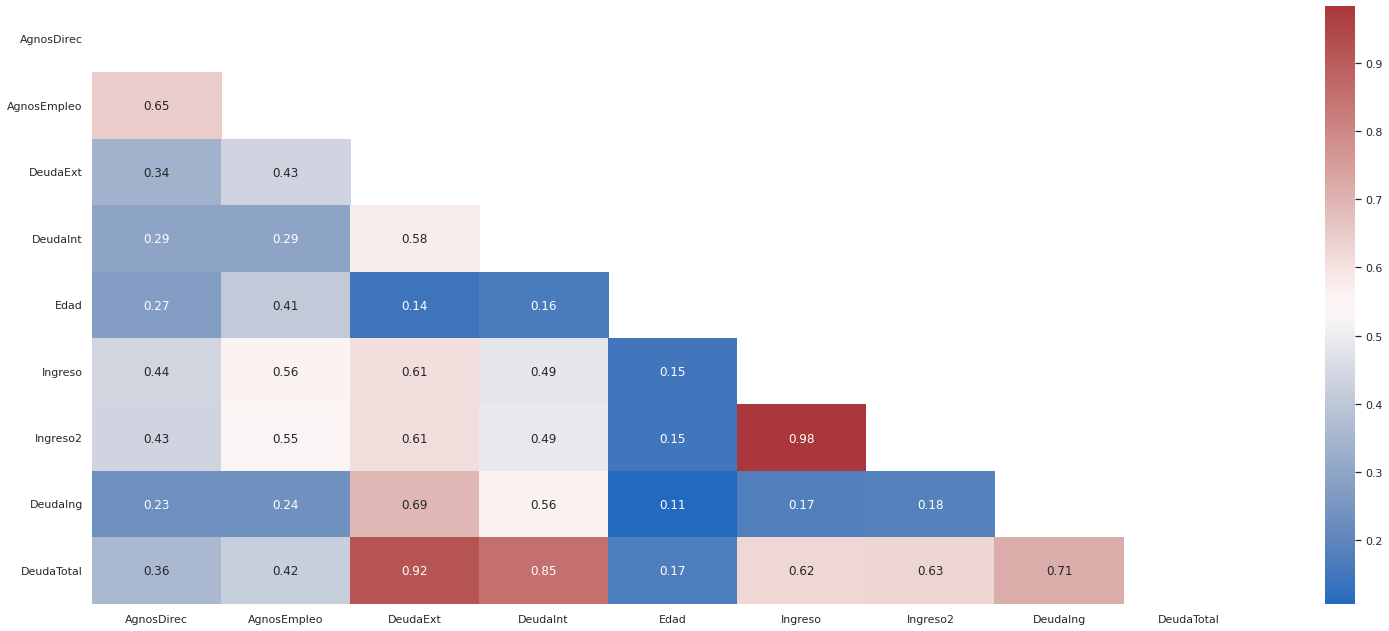

In [ ]:
# heatmap de correlación para variables numéricas no normalizadas
f = ['AgnosDirec', 
     'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad','Ingreso', 
     'Ingreso2', 'DeudaIng', 'DeudaTotal']

corr = df[f].corr(method='pearson').abs().round(3)

f, ax = plt.subplots(figsize=(26, 11))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

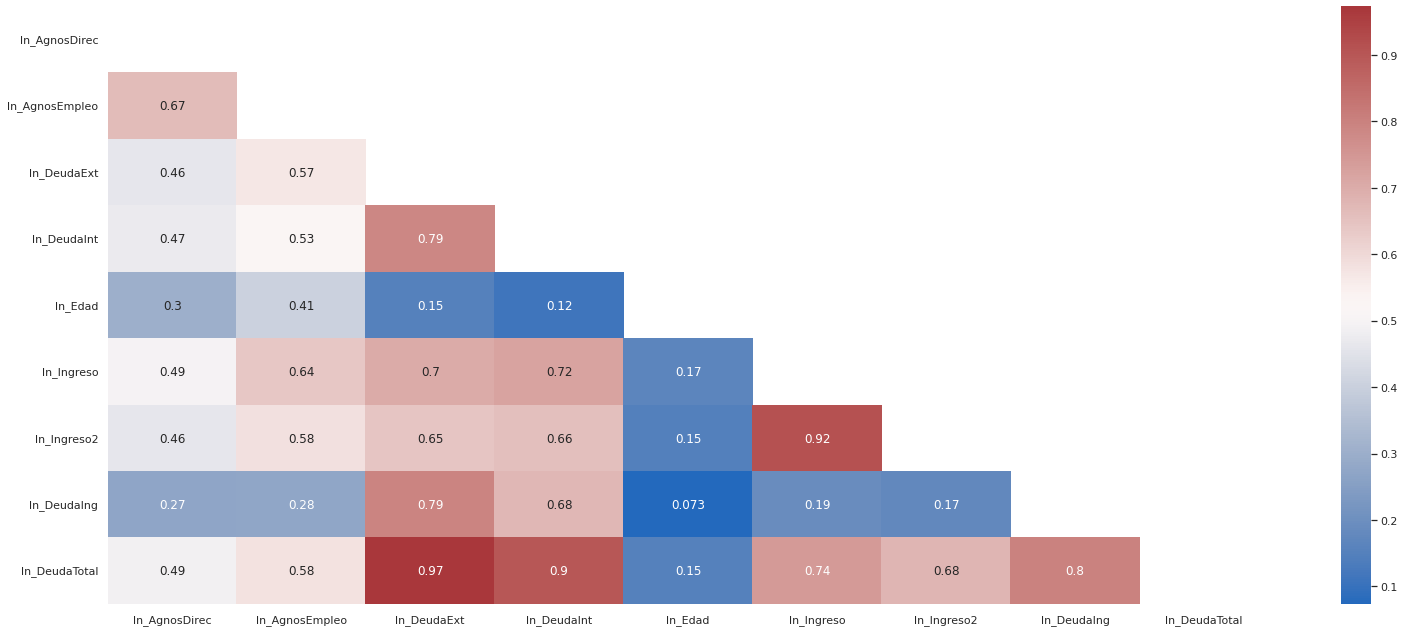

In [ ]:
# heatmap de correlación para variables numéricas normalizadas
f = ['ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso',
       'ln_Ingreso2', 'ln_DeudaIng', 'ln_DeudaTotal']
       
corr2 = df[f].corr(method='pearson').abs().round(3)

f, ax = plt.subplots(figsize=(26, 11))
mask = np.triu(np.ones_like(corr2, dtype=bool))

sns.heatmap(corr2, annot=True, mask = mask, cmap=cmap)

## Selección de Atributos

### Random Forest y Feature Importances

In [ ]:
# muestra del dataframe para random forest
X = df.copy()
X = X[['AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad',
       'Ingreso', 'Ingreso2', 'DeudaIng','NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S', 'DeudaTotal']].sample(1000)
y = X['VarObj_S']
X = X.drop(columns='VarObj_S')

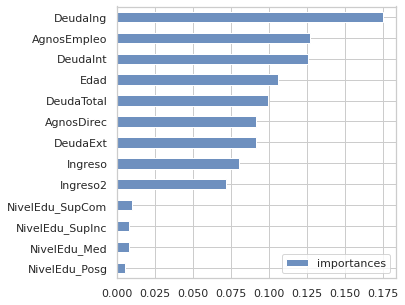

In [ ]:
# entrenamiento y obtención de feature importance para variables no normalizadas
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

bestfeatures = set()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [ ]:
# Top 5 variables: DeudaIng, Edad, AgnosEmpleo, DeudaInt, DeudaTotal
# Ingreso2 > Ingreso

In [ ]:
X = df.copy()
X = X[['ln_AgnosDirec',
       'ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso', "ln_DeudaTotal",
       'ln_Ingreso2', 'ln_DeudaIng', 'NivelEdu_Med', 'NivelEdu_Posg',
       'NivelEdu_SupCom', 'NivelEdu_SupInc', 'VarObj_S']].sample(1000)
y = X['VarObj_S']
X = X.drop(columns='VarObj_S')

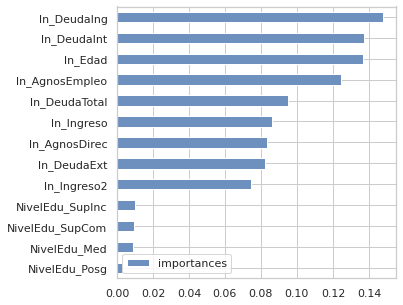

In [ ]:
# entrenamiento y obtención de feature importance para variables normalizadas
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=12345)
forest.fit(X, y)

bestfeatures = set()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X)
imps.sort_values(by="importances").plot.barh(figsize=(5, 5))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features

In [ ]:
# Top 5 variables: ln_DeudaIng, ln_DeudaInt, ln_Edad, ln_AgnosEmpleo, ln_DeudaTotal
# ln_Ingreso > ln_Ingreso2

### Variables Seleccionadas

In [ ]:
# se descartan: 'ID','Nacionalidad' por no aportar información
# se descartan las variables 'AgnosDirec', 'AgnosEmpleo', 'DeudaExt', 'DeudaInt', 'Edad','Ingreso', 'Ingreso2',  'DeudaIng', "DeudaTotal" y se dejan las variables normalizadas
# ln_Ingreso2 se descarta por colinealidad cuasi-perfecta con ln_Ingreso, además de verse con menor feature immportance vs ln_Ingreso
# ln_DeudaTotal se descarta por colinealidad cuasi-perfecta con ln_DeudaInt y ln_DeudaExt, además de verse con menor feature immportance
# se dejan las variables de NivelEdu, al verse una variación entre niveles educacionales sobre la variable objetivo

In [ ]:
features = ['ln_AgnosDirec','ln_AgnosEmpleo', 'ln_DeudaExt', 'ln_DeudaInt', 'ln_Edad', 'ln_Ingreso','ln_DeudaIng',
            'NivelEdu_Med', 'NivelEdu_Posg','NivelEdu_SupCom', 'NivelEdu_SupInc',]
X = df[features]
y = df['VarObj_S']

In [ ]:
X.head()

,ln_AgnosDirec,ln_AgnosEmpleo,ln_DeudaExt,ln_DeudaInt,ln_Edad,ln_Ingreso,ln_DeudaIng,NivelEdu_Med,NivelEdu_Posg,NivelEdu_SupCom,NivelEdu_SupInc
0,1.386294,0.693147,9.165551,8.943772,3.688879,11.068472,-1.314528,0,0,0,1
1,3.332205,3.218876,9.391485,8.835215,3.891820,11.728537,-1.883849,1,0,0,0
2,0.693147,1.098612,6.935717,6.980633,3.637586,10.373831,-2.722257,0,0,1,0
3,2.397895,2.639057,9.303312,7.773776,3.761200,12.057210,-2.557808,0,0,0,0
4,1.098612,0.000000,6.736738,7.041261,3.496508,10.163455,-2.569761,0,0,0,1


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: VarObj_S, dtype: uint8

# Entrenamiento de la Red Neuronal con Descenso del Gradiente

### Split y Escalamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=12345)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Confguración de la Red Neuronal

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# CALLBACKS
callback_es = EarlyStopping(monitor='val_loss', patience=30)
callback_mc = ModelCheckpoint(path_base + '/models/' + 'best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
opt = SGD(learning_rate=0.01)

# METRICS
#metric = Precision()
metric = Recall()

Se utiliza la función de pérdida BinaryCrossentropy(), ya que estamos en un problema de clasificación binaria.

Se utiliza Recall porque (se asume que) es más valioso para el banco reducir los clientes a los que se les da crédito y son malos pagadores, en otras palabras, minimizar pérdidas para la banca, que es lo que podemos obtener con Recall (minimizar falsos negativos).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# red neuronal feed forward
model = Sequential()
model.add(Dense(100, input_dim=11,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

En las capas ocultas se utiliza la función de activación Relu, ya que es la que presenta un mejor desempeño en el entrenamiento de redes neuronales Feedforward según el estado del arte. Para la capa de salida se utiliza la función Sigmoid, ya que estamos en un problema de clasificación binaria. Cabe mencionar que se podía utilizar la función Softmax, pero esta es más demandante computacionalmente.

In [ ]:
model.compile(loss=loss, optimizer=opt, metrics=[metric])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 80)                7280      
                                                                 
 dense_3 (Dense)             (None, 50)                4050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [ ]:
max_epochs = 1000
history = model.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es,callback_mc],verbose=1)

Epoch 1/1000
24/24 [==============================] - 3s 34ms/step - loss: 0.6437 - recall: 0.0214 - val_loss: 0.6019 - val_recall: 0.0000e+00
Epoch 2/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.5788 - recall: 0.0000e+00 - val_loss: 0.5531 - val_recall: 0.0000e+00
Epoch 3/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.5418 - recall: 0.0000e+00 - val_loss: 0.5244 - val_recall: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.5200 - recall: 0.0000e+00 - val_loss: 0.5067 - val_recall: 0.0000e+00
Epoch 5/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.5060 - recall: 0.0000e+00 - val_loss: 0.4948 - val_recall: 0.0000e+00
Epoch 6/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.4959 - recall: 0.0000e+00 - val_loss: 0.4855 - val_recall: 0.0000e+00
Epoch 7/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.4873 - recall: 0.0000e+00 - val_loss: 0.4777 - v

# Evaluación

In [ ]:
acc = history.history['recall']
test_acc = history.history['val_recall']

loss = history.history['loss']
test_loss = history.history['val_loss']

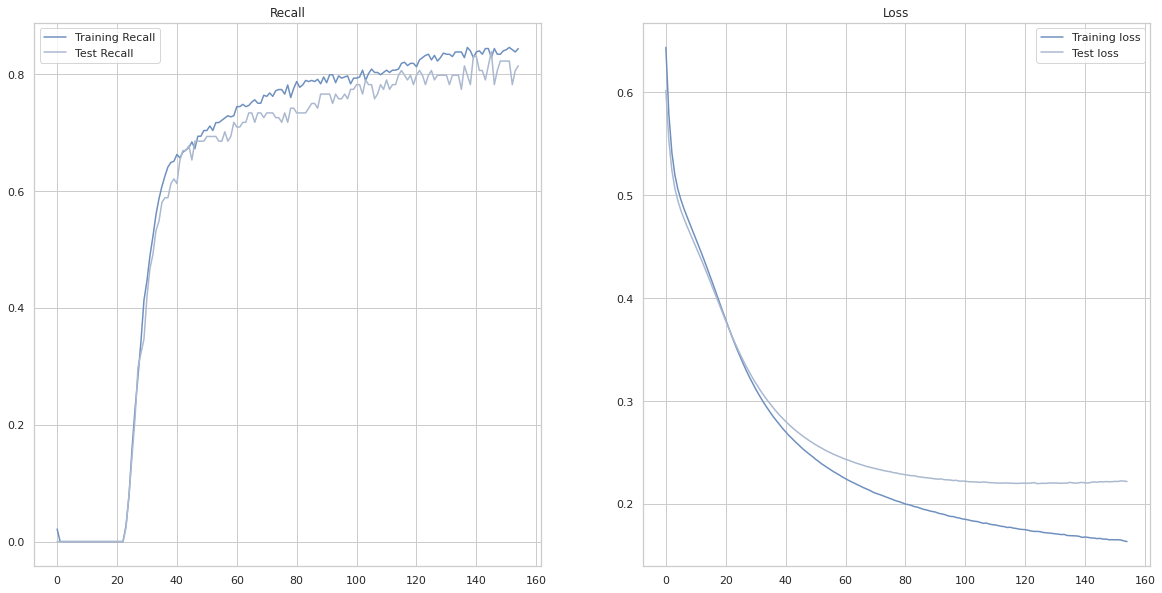

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

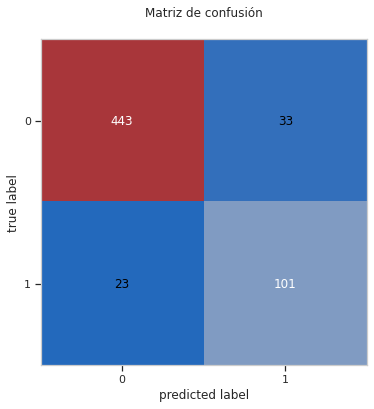

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2218 - recall: 0.8145


[0.2218090295791626, 0.8145161271095276]

In [ ]:
from tensorflow import keras
best_model = keras.models.load_model(path_base + '/models/' + 'best_model.hdf5')

In [ ]:
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

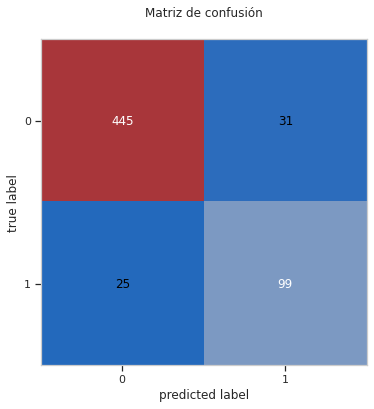

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2197 - recall: 0.7984


[0.21974854171276093, 0.7983871102333069]

# Entrenamiento de Redes Neuronales con distintos Optimizadores

### Confguración de las Redes Neuronales

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# CALLBACKS
callback_es_1 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_1 = ModelCheckpoint(path_base + '/models/' + 'best_model_1.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callback_es_2 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_2 = ModelCheckpoint(path_base + '/models/' + 'best_model_2.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callback_es_3 = EarlyStopping(monitor='val_loss', patience=30)
callback_mc_3 = ModelCheckpoint(path_base + '/models/' + 'best_model_3.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# LOSSES
loss =  BinaryCrossentropy()

# SCHEDULES
lr_schedule_ED = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10,decay_rate=0.95)

# OPTIMIZERS
opt1 = Adam(learning_rate=1e-4)
opt2 = RMSprop(learning_rate=0.01)
opt3 = Adadelta(learning_rate=0.01)

# METRICS
#metric = Precision()
metric = Recall()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_1 = Sequential()
model_1.add(Dense(100, input_dim=11,activation='relu'))
model_1.add(Dense(90,activation='relu'))
model_1.add(Dense(80,activation='relu'))
model_1.add(Dense(50,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

model_2 = Sequential()
model_2.add(Dense(100, input_dim=11,activation='relu'))
model_2.add(Dense(90,activation='relu'))
model_2.add(Dense(80,activation='relu'))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

model_3 = Sequential()
model_3.add(Dense(100, input_dim=11,activation='relu'))
model_3.add(Dense(90,activation='relu'))
model_3.add(Dense(80,activation='relu'))
model_3.add(Dense(50,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

In [ ]:
model_1.compile(loss=loss, optimizer=opt1, metrics=[metric])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 90)                9090      
                                                                 
 dense_7 (Dense)             (None, 80)                7280      
                                                                 
 dense_8 (Dense)             (None, 50)                4050      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(loss=loss, optimizer=opt2, metrics=[metric])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1200      
                                                                 
 dense_11 (Dense)            (None, 90)                9090      
                                                                 
 dense_12 (Dense)            (None, 80)                7280      
                                                                 
 dense_13 (Dense)            (None, 50)                4050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(loss=loss, optimizer=opt3, metrics=[metric])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1200      
                                                                 
 dense_16 (Dense)            (None, 90)                9090      
                                                                 
 dense_17 (Dense)            (None, 80)                7280      
                                                                 
 dense_18 (Dense)            (None, 50)                4050      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

#### Optimizador 1

In [ ]:
max_epochs = 1000
history_1 = model_1.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es_1,callback_mc_1],verbose=1)

Epoch 1/1000
24/24 [==============================] - 1s 15ms/step - loss: 0.6434 - recall_1: 0.0487 - val_loss: 0.6035 - val_recall_1: 0.0000e+00
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5761 - recall_1: 0.0000e+00 - val_loss: 0.5424 - val_recall_1: 0.0000e+00
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.5224 - recall_1: 0.0000e+00 - val_loss: 0.4961 - val_recall_1: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.4815 - recall_1: 0.0000e+00 - val_loss: 0.4630 - val_recall_1: 0.0000e+00
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.4486 - recall_1: 0.0000e+00 - val_loss: 0.4333 - val_recall_1: 0.0000e+00
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.4177 - recall_1: 0.0000e+00 - val_loss: 0.4035 - val_recall_1: 0.0000e+00
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.3870 - recall_1: 0.0234 - v

#### Optimizador 2

In [ ]:
max_epochs = 1000
history_2 = model_2.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es_2,callback_mc_2],verbose=1)

Epoch 1/1000
24/24 [==============================] - 1s 16ms/step - loss: 0.3993 - recall_1: 0.5793 - val_loss: 0.2417 - val_recall_1: 0.7581
Epoch 2/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.2288 - recall_1: 0.7719 - val_loss: 0.2358 - val_recall_1: 0.7903
Epoch 3/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.2273 - recall_1: 0.7641 - val_loss: 0.2258 - val_recall_1: 0.8871
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.2094 - recall_1: 0.7914 - val_loss: 0.2232 - val_recall_1: 0.7016
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.2113 - recall_1: 0.7680 - val_loss: 0.2347 - val_recall_1: 0.7661
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.2036 - recall_1: 0.7797 - val_loss: 0.2128 - val_recall_1: 0.7903
Epoch 7/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.1939 - recall_1: 0.8109 - val_loss: 0.2315 - val_recall_1: 0.7903
Epoch

#### Optimizador 3

In [ ]:
max_epochs = 1000
history_3 = model_3.fit(X_train,y_train, epochs=max_epochs, validation_data=(X_test, y_test),batch_size=100, callbacks=[callback_es_3,callback_mc_3],verbose=1)

Epoch 1/1000
24/24 [==============================] - 1s 14ms/step - loss: 0.6530 - recall_1: 0.1429 - val_loss: 0.6523 - val_recall_1: 0.0000e+00
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.6453 - recall_1: 0.0000e+00 - val_loss: 0.6447 - val_recall_1: 0.0000e+00
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.6377 - recall_1: 0.0000e+00 - val_loss: 0.6372 - val_recall_1: 0.0000e+00
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.6302 - recall_1: 0.0000e+00 - val_loss: 0.6297 - val_recall_1: 0.0000e+00
Epoch 5/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.6227 - recall_1: 0.0000e+00 - val_loss: 0.6221 - val_recall_1: 0.0000e+00
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.6152 - recall_1: 0.0000e+00 - val_loss: 0.6146 - val_recall_1: 0.0000e+00
Epoch 7/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.6077 - recall_1: 0.0000e+00

# Evaluación de Redes Neuronales con distintos Optimizadores

## Evaluación Optimizador: Adam

In [ ]:
acc = history_1.history['recall_1']
test_acc = history_1.history['val_recall_1']

loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

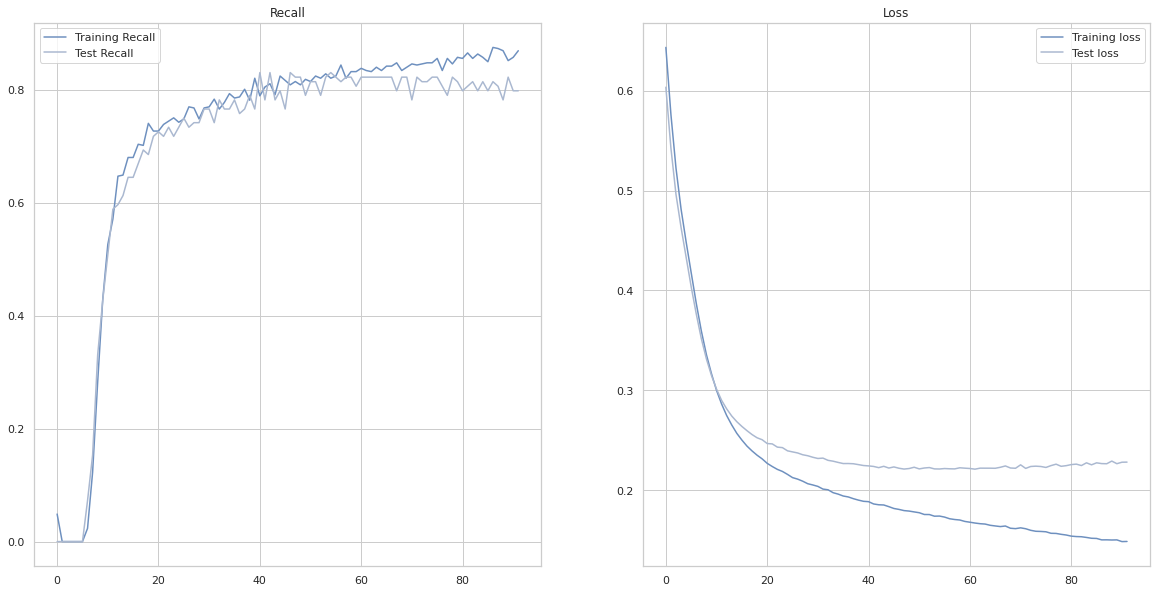

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
y_pred = model_1.predict(X_test)
y_pred = np.round(y_pred)

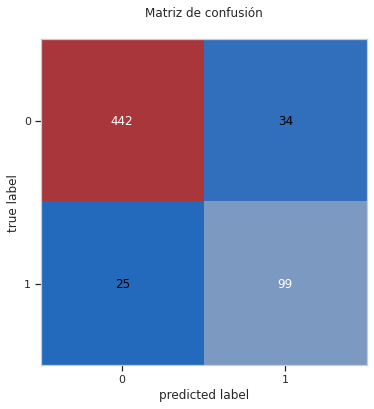

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2280 - recall_1: 0.7984


[0.22798940539360046, 0.7983871102333069]

In [ ]:
from tensorflow import keras
best_model_1 = keras.models.load_model(path_base + '/models/' + 'best_model_1.hdf5')

In [ ]:
y_pred = best_model_1.predict(X_test)
y_pred = np.round(y_pred)

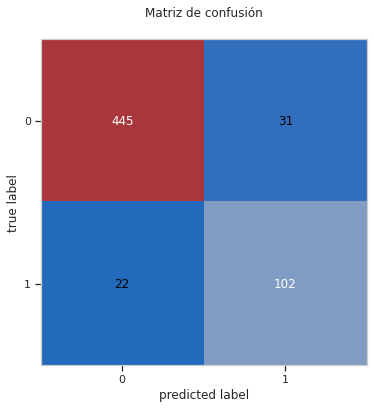

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2209 - recall_1: 0.8226


[0.2209259271621704, 0.8225806355476379]

## Evaluación Optimizador: RMSprop

In [ ]:
acc = history_2.history['recall_1']
test_acc = history_2.history['val_recall_1']

loss = history_2.history['loss']
test_loss = history_2.history['val_loss']

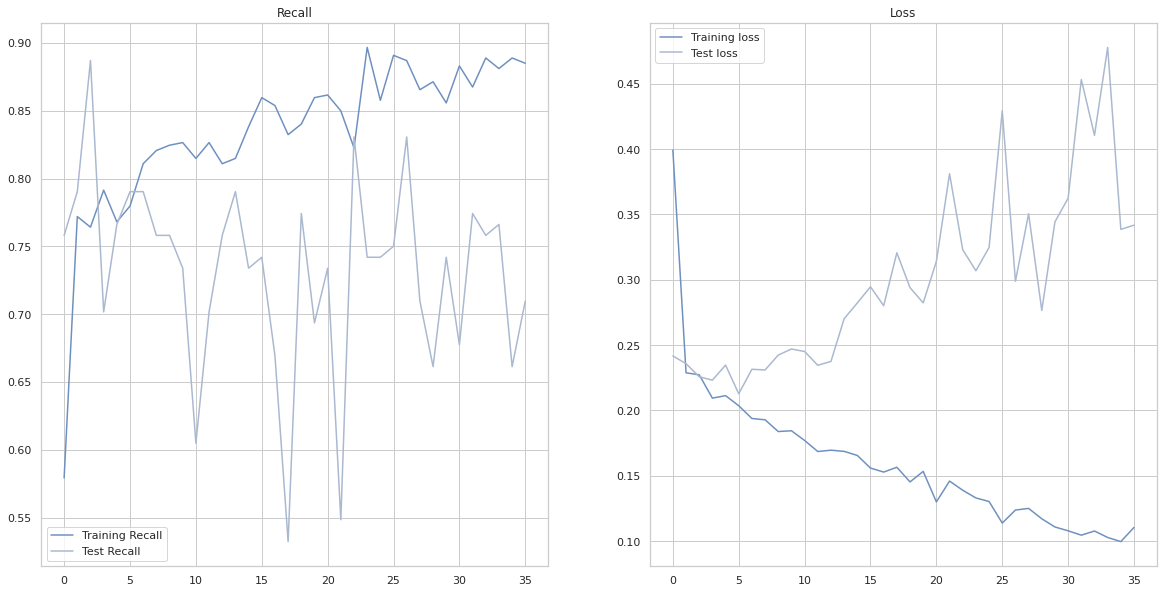

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred)

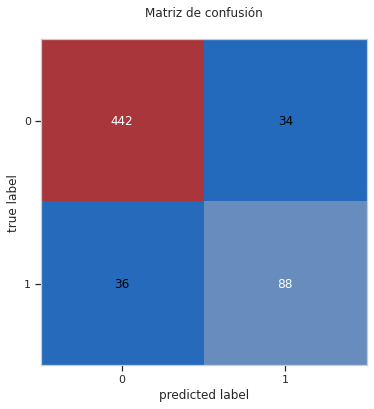

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.3418 - recall_1: 0.7097


[0.3417641818523407, 0.7096773982048035]

In [ ]:
from tensorflow import keras
best_model_2 = keras.models.load_model(path_base + '/models/' + 'best_model_2.hdf5')

In [ ]:
y_pred = best_model_2.predict(X_test)
y_pred = np.round(y_pred)

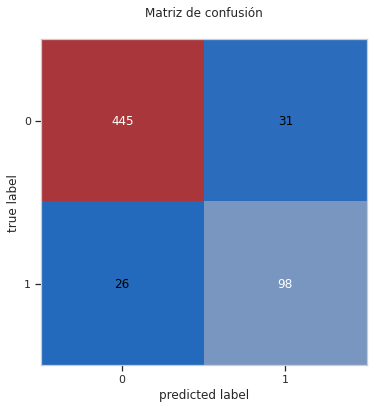

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2128 - recall_1: 0.7903


[0.21276859939098358, 0.7903226017951965]

## Evaluación Optimizador: Adadelta

In [ ]:
acc = history_3.history['recall_1']
test_acc = history_3.history['val_recall_1']

loss = history_3.history['loss']
test_loss = history_3.history['val_loss']

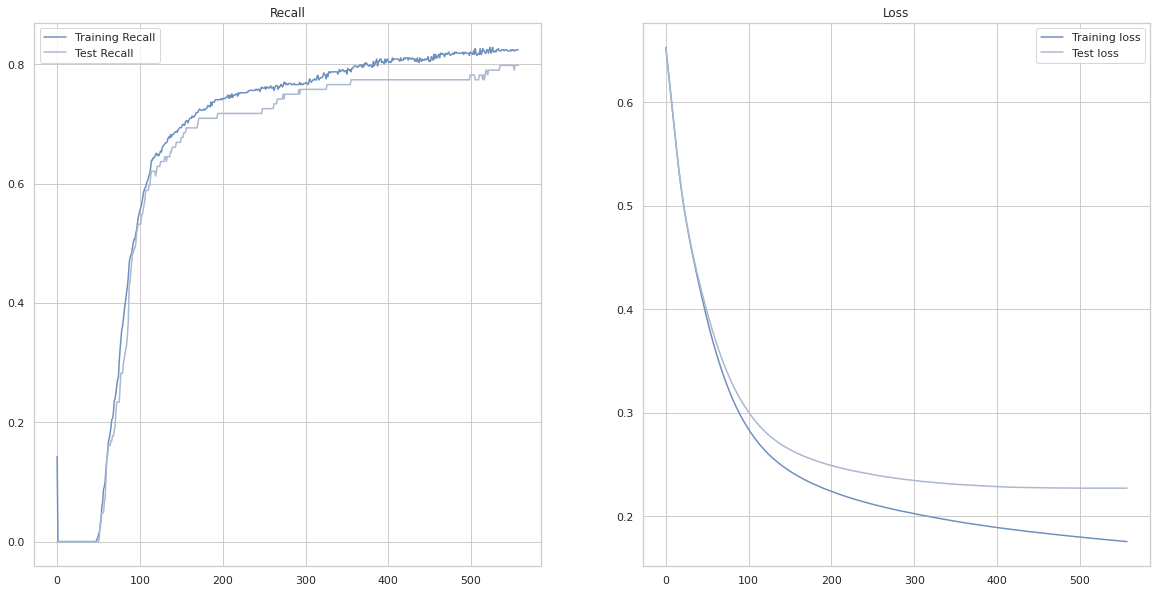

In [ ]:
figura, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

n_epochs = len(acc)

ax1.plot(range(n_epochs), acc, label='Training Recall')
ax1.plot(range(n_epochs), test_acc, label='Test Recall')
ax1.set_title('Recall')
ax1.legend()

ax2.plot(range(n_epochs), loss, label='Training loss')
ax2.plot(range(n_epochs), test_loss, label='Test loss')
ax2.set_title('Loss')
ax2.legend()

In [ ]:
y_pred = model_3.predict(X_test)
y_pred = np.round(y_pred)

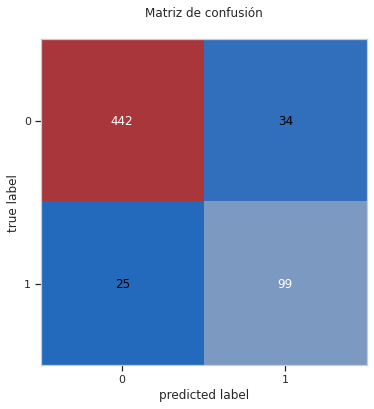

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2273 - recall_1: 0.7984


[0.22729891538619995, 0.7983871102333069]

In [ ]:
from tensorflow import keras
best_model_3 = keras.models.load_model(path_base + '/models/' + 'best_model_3.hdf5')

In [ ]:
y_pred = best_model_3.predict(X_test)
y_pred = np.round(y_pred)

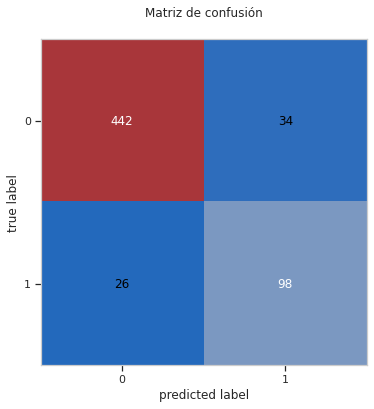

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
best_model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2272 - recall_1: 0.7903


[0.2272183746099472, 0.7903226017951965]

# Resumen de Desempeño de las Redes Neuronales

In [ ]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2197 - recall: 0.7984


[0.21974854171276093, 0.7983871102333069]

In [ ]:
best_model_1.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2209 - recall_1: 0.8226


[0.2209259271621704, 0.8225806355476379]

In [ ]:
best_model_2.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2128 - recall_1: 0.7903


[0.21276859939098358, 0.7903226017951965]

In [ ]:
best_model_3.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2272 - recall_1: 0.7903


[0.2272183746099472, 0.7903226017951965]

# Conclusiones

En preprocesamiento de datos se eliminaron outliers, se normalizaron variables, imputaron valores faltantes, se transformaron variables categóricas a binarias y se descartaron atributos muy concentrados para facilitar el entrenamiento de los modelos y así obtener mejores resultados con datos limpios y estandarizados.

En base a los resultados vistos en las secciones anteriores, se obtuvo que la red neuronal mejor entrenada es la que utiliza el optimizador Adam, con un Recall del 82,26%, es decir, es capaz de clasificar a clientes malos pagadores como tal con un 82,26% de precisión. Por último, esta red presenta un 32,26% de mayor precisión al clasificar a malos pagadores que en el peor de los casos (50% que sería tirar una moneda).

Finalmente, el diagrama del modelo con mejor desempeño corresponde a:

In [ ]:
# con optimizador Adam, función de pérdida Binarycrossentropy y learning rate = 1e-4
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 90)                9090      
                                                                 
 dense_7 (Dense)             (None, 80)                7280      
                                                                 
 dense_8 (Dense)             (None, 50)                4050      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 21,671
Trainable params: 21,671
Non-trainable params: 0
_________________________________________________________________
